In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data (1).csv")

In [7]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


# Understand the data-Inspect the data


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [9]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [10]:
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

#  Understand the data - Investigate the variables

In [11]:
#Sort the data by trip_distance and arrange these value in descending order
df.sort_values(by='trip_distance',ascending=False).head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38


In [12]:
#Sort the data by total amount and print the first 20 values
df.sort_values(by="total_amount",ascending=False)['total_amount'].head(20)

8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
6064      179.06
16379     157.06
3582      152.30
11269     151.82
9280      150.30
1928      137.80
10291     131.80
6708      126.00
11608     123.30
908       121.56
7281      120.96
18130     119.31
13621     115.94
13359     111.95
29        111.38
Name: total_amount, dtype: float64

In [13]:
#Sort the data by total amount and print the bottom 20 values
df.sort_values(by="total_amount",ascending=False)['total_amount'].tail(20)

14283      0.31
19067      0.30
10506      0.00
5722       0.00
4402       0.00
22566      0.00
1646      -3.30
18565     -3.80
314       -3.80
5758      -3.80
5448      -4.30
4423      -4.30
10281     -4.30
8204      -4.80
20317     -4.80
11204     -5.30
14714     -5.30
17602     -5.80
20698     -5.80
12944   -120.30
Name: total_amount, dtype: float64

In [14]:
# How many of each payment type are represented in the data?
df['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

In [15]:
#What is the average tip for trips paid for with credit card?
avg=df[df['payment_type']==1]['tip_amount'].mean()
print("Average tip for trips paid for with credit card:",avg)

Average tip for trips paid for with credit card: 2.7298001965279934


In [16]:
#What is the average tip for trips paid for with cash?
avg=df[df['payment_type']==2]['tip_amount'].mean()
print("Average tip for trips paid for with cash:",avg)

Average tip for trips paid for with cash: 0.0


In [17]:

# How many times is each vendor ID represented in the data?
df['VendorID'].value_counts()

2    12626
1    10073
Name: VendorID, dtype: int64

In [18]:
# Filter the data for credit card payments only
credit_card=df[df['payment_type']==1]
# Filter the credit-card-only data for passenger count only
credit_card['passenger_count'].value_counts()

1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: passenger_count, dtype: int64

In [19]:

# What is the mean total amount for each vendor?
df.groupby(['VendorID'])['total_amount'].mean()


VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64

# Data visualization

In [20]:
#Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

# Box plot

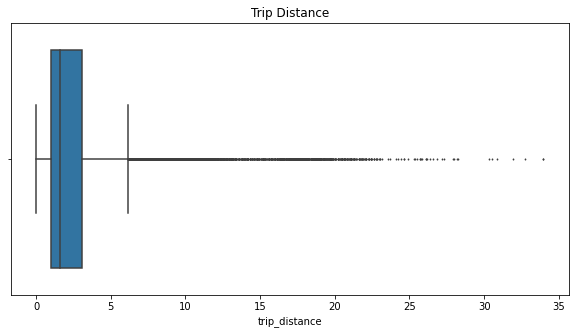

In [21]:
# Create box plot of trip_distance
plt.figure(figsize=(10,5))
plt.title('Trip Distance')
sns.boxplot(x=df['trip_distance'],fliersize=1)
plt.show()

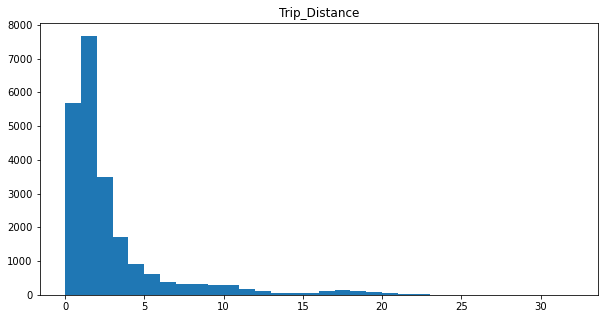

In [22]:
#Create histogram of trip_distance
plt.figure(figsize=(10,5))
plt.hist(x=df['trip_distance'],bins=range(0,33,1))
plt.title('Trip_Distance')
plt.show()

*Exemplar note:** The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

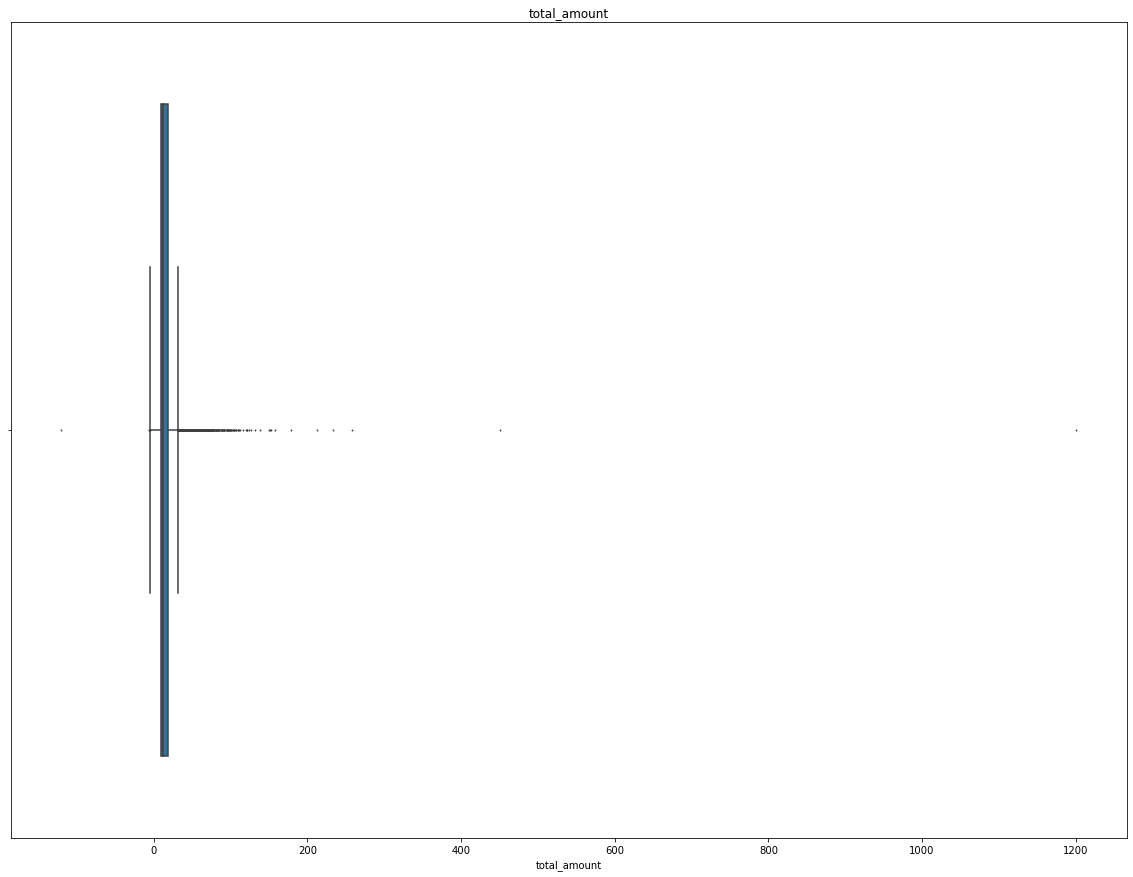

In [23]:
# Create box plot of total_amount
plt.figure(figsize=(20,15))
sns.boxplot(x=df['total_amount'],fliersize=1)
plt.title('total_amount')
plt.show()

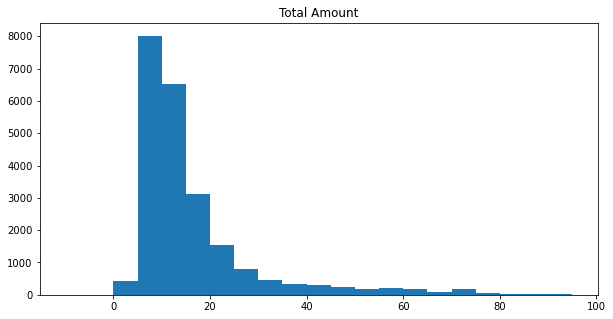

In [24]:
# Create histogram of total_amount
plt.figure(figsize=(10,5))
plt.hist(x=df['total_amount'],bins=range(-10,100,5))
plt.title("Total Amount")
plt.show()

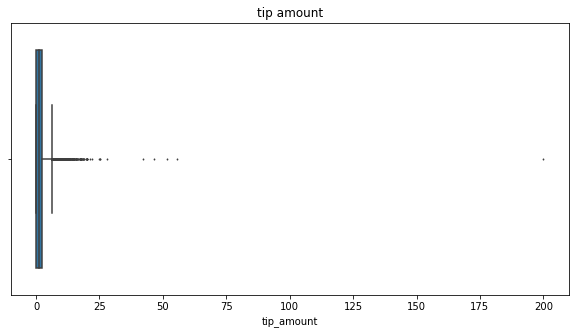

In [25]:
# Create box plot of tip_amount
plt.figure(figsize=(10,5))
sns.boxplot(x=df['tip_amount'],fliersize=1)
plt.title("tip amount")
plt.show()

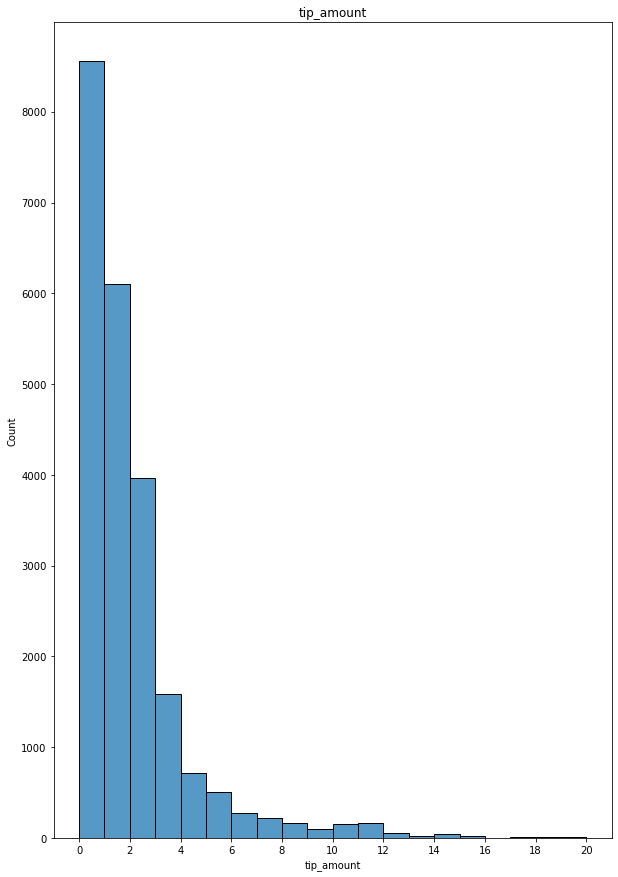

In [26]:
# Create hist plot of tip_amount
plt.figure(figsize=(10,15))
ax=sns.histplot(x=df['tip_amount'],bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title("tip_amount");

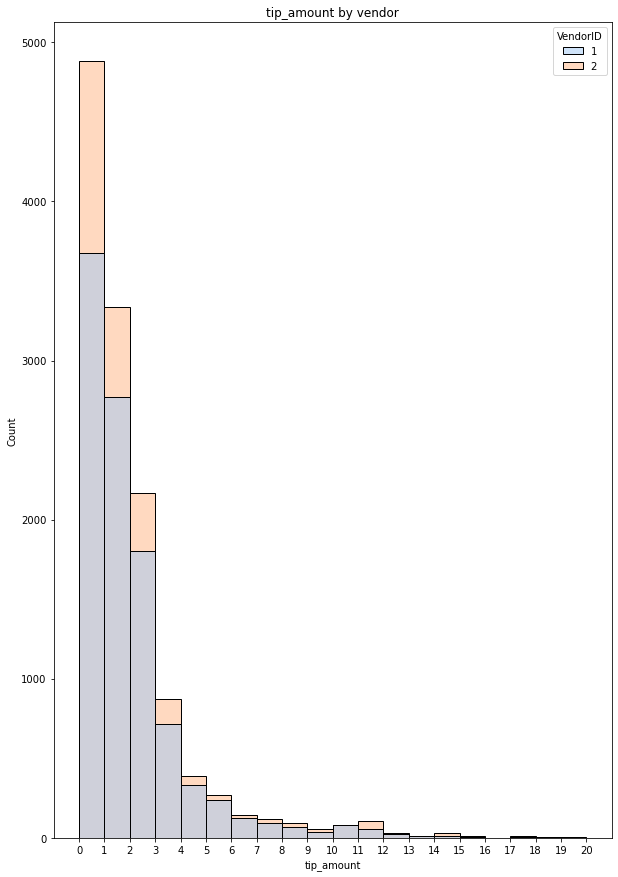

In [27]:

#tip_amount by vendor
plt.figure(figsize=(10,15))
ax=sns.histplot(x=df['tip_amount'],data=df,bins=range(0,21,1),hue='VendorID',palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title("tip_amount by vendor");

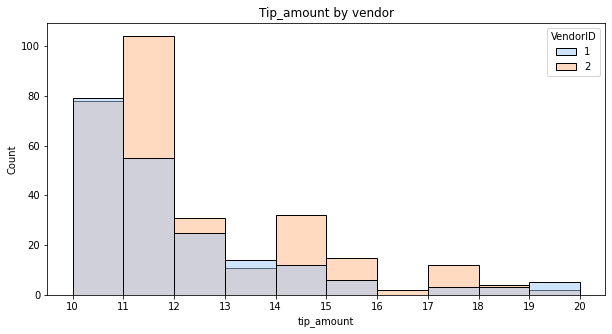

In [28]:
# Create histogram of tip_amount by vendor for tips > $10
tips_over_ten=df[df["tip_amount"]>10]
plt.figure(figsize=(10,5))
ax=sns.histplot(data=df,x=df["tip_amount"],bins=range(10,21,1),hue="VendorID",palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip_amount by vendor');

In [29]:
#Mean tips by passenger count

In [30]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [31]:
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean()[['tip_amount']]
mean_tips_by_passenger_count



,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


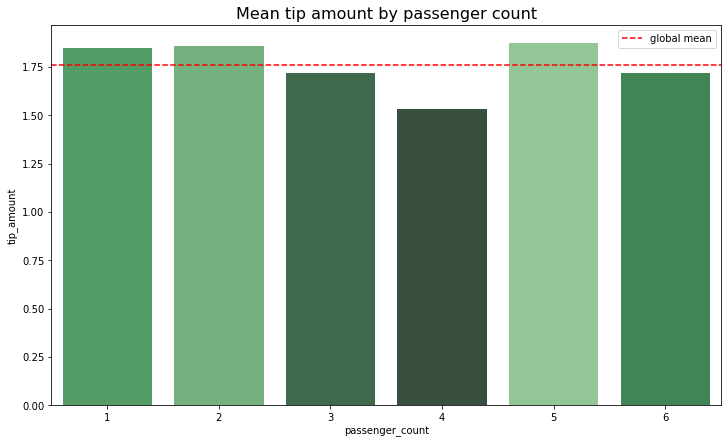

In [32]:
# Create bar plot for mean tips by passenger count

# Create bar plot for mean tips by passenger count
df1 = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(df1))
rank = df1['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=df1.index,
            y=df1['tip_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df1['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

In [33]:
# Create a month column
df['month']=df['tpep_pickup_datetime'].dt.month_name()
df['day']=df['tpep_pickup_datetime'].dt.day_name()

In [34]:
# Get total number of rides for each month]
month=df['month'].value_counts()
print(month)

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64


In [35]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
monthly_order=month.reindex(index=month_order)
print(monthly_order)

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64


In [36]:
# Show the index
monthly_order.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

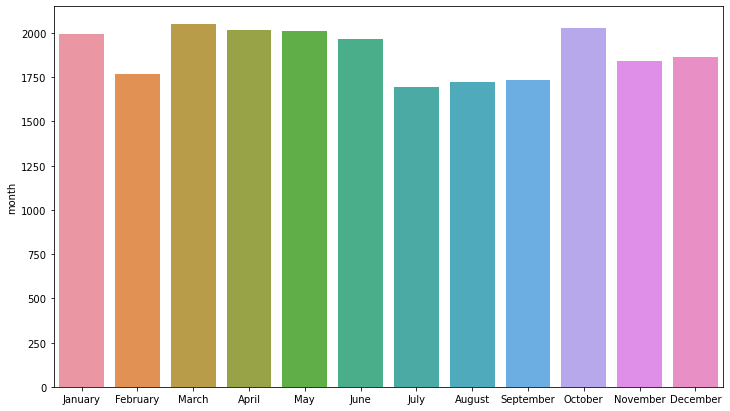

In [37]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax=sns.barplot(x=monthly_order.index,y=monthly_order)
ax.set_xticklabels(month_order)
plt.show()

 Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February

# Plot total ride count by day

In [38]:
# Repeat the above process, this time for rides by day
day=df['day'].value_counts()
day

Friday       3413
Thursday     3402
Wednesday    3390
Saturday     3367
Tuesday      3198
Sunday       2998
Monday       2931
Name: day, dtype: int64

In [39]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides=day.reindex(index=day_order)
daily_rides.index

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

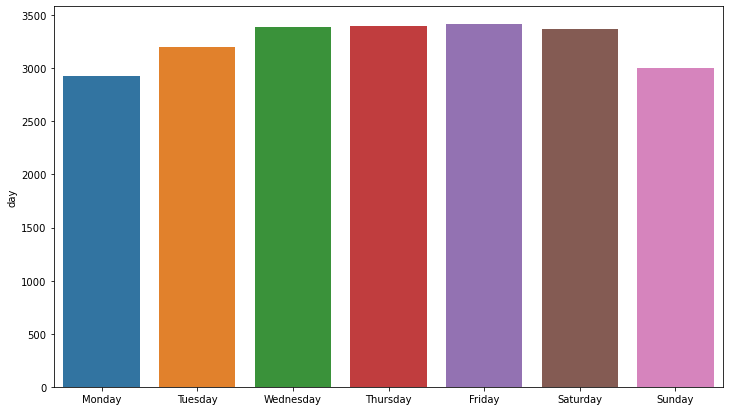

In [40]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
axes=sns.barplot(x=daily_rides.index,y=daily_rides)
axes.set_xticklabels(day_order)
plt.show()

 Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least

# Plot total revenue by day of the week



In [41]:
# Repeat the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_revenue=df.groupby(['day']).sum()[['total_amount']]
total_amount_day=total_revenue.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


In [42]:
total_revenue.index

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='day')

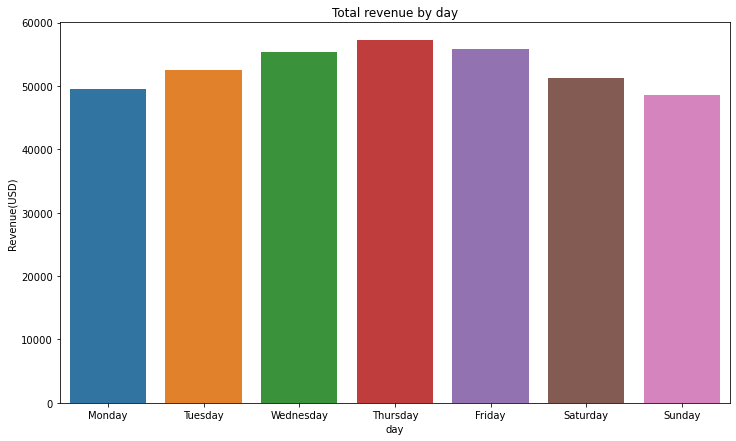

In [43]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
axes=sns.barplot(x=total_amount_day.index,y=total_amount_day['total_amount'])
axes.set_xticklabels(day_order)
axes.set_ylabel('Revenue(USD)')
plt.title("Total revenue by day")
plt.show()

Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

# Plot total revenue by month

In [44]:
# Repeat the process, this time for total revenue by month
total_amount_month=df.groupby(['month']).sum()[['total_amount']]
total_amount_generate=total_amount_month.reindex(index=month_order)
total_amount_generate

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


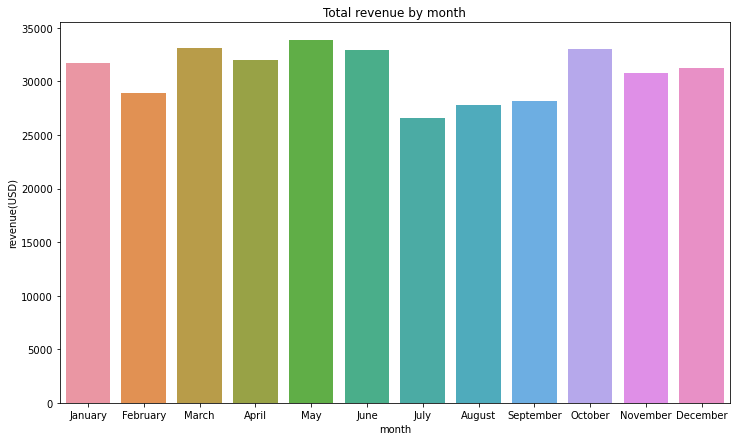

In [45]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
axes=sns.barplot(x=total_amount_generate.index,y=total_amount_generate['total_amount'])
axes.set_xticklabels(month_order)
axes.set_ylabel('revenue(USD)')
plt.title("Total revenue by month")
plt.show()

Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

# **Plot mean trip distance by drop-off location**

In [46]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean()[['trip_distance']]
distance_by_dropoff.head(5)

,trip_distance
DOLocationID,
1,17.027353
4,2.436634
7,3.964944
9,9.305000
10,3.750000


In [47]:

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance', ascending=False)

distance_by_dropoff.head(5)

,trip_distance
DOLocationID,
23,24.275
29,21.650
210,20.500
11,17.945
51,17.310


In [48]:
distance_by_dropoff_sorted=distance_by_dropoff.sort_values(by='trip_distance',ascending=True).head(5)
distance_by_dropoff_sorted.head(5)


,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852


<function matplotlib.pyplot.show(close=None, block=None)>

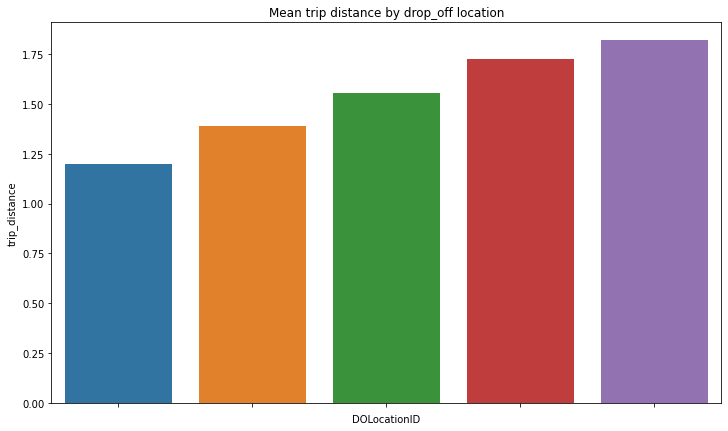

In [49]:
plt.figure(figsize=(12,7))
axes=sns.barplot(x=distance_by_dropoff_sorted.index,y=distance_by_dropoff_sorted['trip_distance'], order=distance_by_dropoff_sorted.index)
axes.set_xticklabels([])
plt.title("Mean trip distance by drop_off location")
plt.show

# Statistical analysis

To analyze the relationship between fare amount and payment type. to analyze the relationship between fare amount and payment type. 

The purpose of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

Note: For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

The goal is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.

# Conduct an A/B test

In [50]:
#Import  libraries
from scipy import stats
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data (1).csv", index_col = 0)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [51]:
# descriptive stats code for EDA
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [52]:
df.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

In [53]:
df.groupby('payment_type').mean()[['fare_amount']]

,fare_amount
payment_type,
1,13.429748
2,12.213546
3,12.186116
4,9.913043


Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, you conduct a hypothesis test

# Hypothesis testing

In [54]:
#hypothesis test, A/B test
#significance level
credit_card=df[df['payment_type']==1]['fare_amount']
cash=df[df['payment_type']==2]['fare_amount']
stats.ttest_ind(a=credit_card,b=cash,equal_var=False)

Ttest_indResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12)

Since the p-value is significantly smaller than the significance level of 5%, you reject the null hypothesis.

Notice the 'e-12' at the end of the pvalue result.

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.

# Model Building

# Build a multiple linear regression model

In this activity, I have build a multiple linear regression model. As I have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data professionals, this is a useful skill because it allows to consider more than one variable against the variable measuring against. This opens the door for much more thorough and flexible analysis to be completed.


In [55]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

There are no duplicates or missing values in the data.

In [56]:
###. Convert pickup & dropoff columns to datetime
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data (1).csv")
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


In [57]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [58]:
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40.800000
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.133333
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333


In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [60]:
from scipy import stats

# Define a threshold for Z-score
z_threshold = 3

# Loop through each column
for column in df.columns:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate Z-scores for each value in the column
        z_scores = stats.zscore(df[column])
        # Check if any Z-score exceeds the threshold
        if (z_scores > z_threshold).any():
            print(f"Column '{column}' contains outliers.")

Column 'passenger_count' contains outliers.
Column 'trip_distance' contains outliers.
Column 'RatecodeID' contains outliers.
Column 'payment_type' contains outliers.
Column 'fare_amount' contains outliers.
Column 'extra' contains outliers.
Column 'tip_amount' contains outliers.
Column 'tolls_amount' contains outliers.
Column 'total_amount' contains outliers.
Column 'duration' contains outliers.


In [61]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Loop through each column
for column in df.columns:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(df[column]):
        # Detect outliers using IQR
        outliers = detect_outliers_iqr(df[column])
        # Check if any outliers are found
        if outliers.any():
            print(f"Column '{column}' contains outliers.")

Column 'passenger_count' contains outliers.
Column 'trip_distance' contains outliers.
Column 'RatecodeID' contains outliers.
Column 'payment_type' contains outliers.
Column 'fare_amount' contains outliers.
Column 'extra' contains outliers.
Column 'mta_tax' contains outliers.
Column 'tip_amount' contains outliers.
Column 'tolls_amount' contains outliers.
Column 'improvement_surcharge' contains outliers.
Column 'total_amount' contains outliers.
Column 'duration' contains outliers.


In [155]:
df.head(2)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80


In [156]:
x=df[['passenger_count','trip_distance','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge']]
x

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,6,3.34,1,13.0,0.0,0.5,2.76,0.00,0.3
1,1,1.80,1,16.0,0.0,0.5,4.00,0.00,0.3
2,1,1.00,1,6.5,0.0,0.5,1.45,0.00,0.3
3,1,3.70,1,20.5,0.0,0.5,6.39,0.00,0.3
4,1,4.37,2,16.5,0.5,0.5,0.00,0.00,0.3
...,...,...,...,...,...,...,...,...,...
22694,3,0.61,2,4.0,1.0,0.5,0.00,0.00,0.3
22695,1,16.71,1,52.0,0.0,0.5,14.64,5.76,0.3
22696,1,0.42,2,4.5,0.0,0.5,0.00,0.00,0.3
22697,1,2.36,1,10.5,0.0,0.5,1.70,0.00,0.3


In [65]:
y=df['total_amount']
y

0        16.56
1        20.80
2         8.75
3        27.69
4        17.80
         ...  
22694     5.80
22695    73.20
22696     5.30
22697    13.00
22698    14.15
Name: total_amount, Length: 22699, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)


In [67]:
X_train.shape

(15889, 9)

In [68]:

x_test

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
18896,6,1.87,1,10.5,0.5,0.5,1.20,0.0,0.3
6269,1,1.53,1,9.0,0.0,0.5,1.96,0.0,0.3
12563,1,2.20,1,10.0,0.0,0.5,2.15,0.0,0.3
6840,1,0.97,2,7.0,0.0,0.5,0.00,0.0,0.3
9851,2,1.92,2,9.5,0.0,0.5,0.00,0.0,0.3
...,...,...,...,...,...,...,...,...,...
14116,1,5.00,1,19.0,0.0,0.5,2.00,0.0,0.3
12080,1,1.64,1,8.5,0.0,0.5,1.86,0.0,0.3
1815,4,0.60,2,9.0,1.0,0.5,0.00,0.0,0.3
4043,1,0.99,1,9.5,0.0,0.5,2.06,0.0,0.3


In [69]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [70]:
reg.fit(X_train,Y_train)

LinearRegression()

In [71]:
forward_feature_selection = SequentialFeatureSelector(reg, 
                                        n_features_to_select=5,
                                        direction='forward', 
                                        scoring='neg_mean_squared_error', 
                                        cv=5).fit(X_train,Y_train)

In [72]:
selected_features_indices = forward_feature_selection.get_support(indices=True)

In [73]:
selected_features_indices

array([3, 4, 5, 6, 7], dtype=int64)

In [74]:
selected_features = x.columns[selected_features_indices]

In [75]:
selected_features

Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount'], dtype='object')

# Imputations


You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [76]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?


Calculate the count of rides where the `trip_distance` is zero.

In [77]:
sum(df['trip_distance']==0)

148

 148 out of ~23,000 rides is relatively insignificant. You could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the `trip_distance` column will remain untouched with regard to outliers.

fare_amount` outliers

In [78]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [79]:
#Impute values less than $0 with 
df.loc[df['fare_amount'] < 0,'fare_amount'] = 0
df['fare_amount'].min()
   

0.0

Now impute the maximum value as Q3 + (6 * IQR).

In [80]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
           

In [81]:
outlier_imputer(['fare_amount'],6)
df['fare_amount']

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22694     4.0
22695    52.0
22696     4.5
22697    10.5
22698    11.0
Name: fare_amount, Length: 22699, dtype: float64

duration_outliers

In [82]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [83]:
df.loc[df['duration'] < 0 ,'duration'] = 0
df['duration'].min()

0.0

In [84]:
def outlier_imputer(column_list, iqr_factor):
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
           

In [85]:
outlier_imputer(['duration'],6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


# Feature engineering

Create `mean_distance` column

In [86]:
#Create `pickup_dropoff` column
df['pickup_dropoff']=df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(5)

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

In [87]:
grouped=df.groupby(['pickup_dropoff']).mean(numeric_only=True)[['trip_distance']]
grouped.head(5)

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [88]:
grouped_dict=grouped.to_dict()
grouped_dict=grouped_dict['trip_distance']
grouped_dict


{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

In [89]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance']=df['pickup_dropoff']
df['mean_distance']=df['mean_distance'].map(grouped_dict)
# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [90]:
grouped2=df.groupby(['pickup_dropoff']).mean(numeric_only=True)[['duration']]
grouped2_dict=grouped2.to_dict()
grouped2_dict=grouped2_dict['duration']
grouped2_dict

{'1 1': 0.4666666666666666,
 '10 148': 69.36666666666666,
 '100 1': 48.18333333333333,
 '100 100': 3.130555555555556,
 '100 107': 11.200000000000001,
 '100 113': 14.453333333333333,
 '100 114': 15.325,
 '100 12': 17.975,
 '100 125': 17.608333333333334,
 '100 13': 31.902777777777775,
 '100 132': 35.22083333333333,
 '100 137': 9.286666666666667,
 '100 138': 44.78333333333334,
 '100 140': 19.65,
 '100 141': 13.616666666666667,
 '100 142': 11.6,
 '100 143': 10.883333333333333,
 '100 144': 22.855555555555554,
 '100 148': 33.416666666666664,
 '100 151': 15.41,
 '100 152': 19.766666666666666,
 '100 158': 11.836666666666668,
 '100 161': 8.9875,
 '100 162': 11.11590909090909,
 '100 163': 11.472000000000001,
 '100 164': 9.518333333333334,
 '100 166': 15.816666666666666,
 '100 170': 8.276666666666666,
 '100 177': 58.53333333333333,
 '100 181': 28.55,
 '100 186': 5.765873015873016,
 '100 193': 15.566666666666666,
 '100 198': 53.9,
 '100 202': 39.35,
 '100 209': 29.733333333333334,
 '100 211': 14.3

In [91]:
df['mean_duration']=df['pickup_dropoff']
df['mean_duration']=df['mean_duration'].map(grouped2_dict)
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


Create day and month columns

In [92]:
df['day']=df['tpep_pickup_datetime'].dt.day_name().str.lower()

In [93]:
df['day']

0        saturday
1         tuesday
2          friday
3          sunday
4        saturday
           ...   
22694      friday
22695      sunday
22696      monday
22697    saturday
22698    thursday
Name: day, Length: 22699, dtype: object

In [94]:
df['month']=df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()
df['month']

0        mar
1        apr
2        dec
3        may
4        apr
        ... 
22694    feb
22695    aug
22696    sep
22697    jul
22698    mar
Name: month, Length: 22699, dtype: object

Create `rush_hour` column


Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [95]:
df['rush_hour']=df['tpep_pickup_datetime'].dt.hour
df.loc[df['day'].isin(['saturday,sunday']),'rush_hour']=0

In [96]:
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday,sunday']),'rush_hour']=0


In [97]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val
        

In [98]:
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,23


# Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

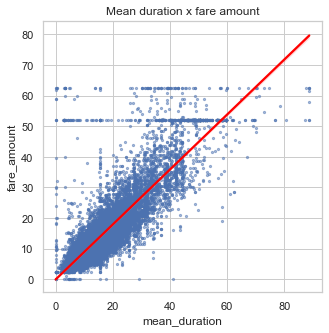

In [99]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.title('Mean duration x fare amount')
plt.show()

Check the value of the rides in the second horizontal line in the scatter plot.

In [100]:
df[df['fare_amount']>50]["fare_amount"].value_counts().head(10)

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
51.0      7
60.0      6
55.0      6
51.5      6
53.0      4
Name: fare_amount, dtype: int64

There are 514 trips whose fares were $52.

In [101]:
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,...,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,19
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,...,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,14
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,...,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,20
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,...,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,...,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,23
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,...,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,...,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,...,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,...,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,...,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,21


In [102]:
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


# Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

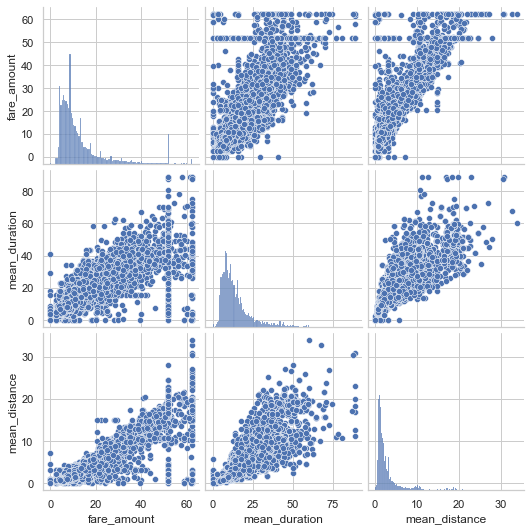

In [103]:
sns.pairplot(df2[['fare_amount','mean_duration','mean_distance']])
plt.show()

These variables all show linear correlation with each other. Investigate this further.

Identify correlations


Next, code a correlation matrix to help determine most correlated variables.

In [104]:
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.006856
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,0.020436
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.007513
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,0.000243
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.001594
rush_hour,-0.006856,0.020436,-0.007513,0.000243,-0.001594,1.000000


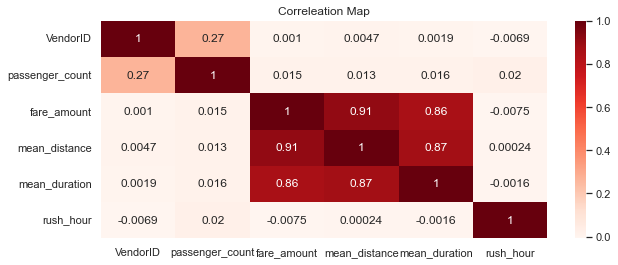

In [105]:
plt.figure(figsize=(10,4))
sns.heatmap(df2.corr(method='pearson'),annot=True,cmap='Reds')
plt.title('Correleation Map')
plt.show()

mean_duration and mean_distance are both highly correlated with the target variable of fare_amount They're also both correlated with each other, with a Pearson correlation of 0.87.


# Split data into outcome variable and features

In [106]:
X=df2.drop('fare_amount',axis=1)

In [107]:
Y=df2['fare_amount']

In [108]:
X

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,8
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,13
4,2,1,4.435000,14.616667,23
...,...,...,...,...,...
22694,2,3,1.098214,8.594643,1
22695,2,1,18.757500,59.560417,16
22696,2,1,0.684242,6.609091,0
22697,2,1,2.077500,16.650000,12


In [109]:
Y

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22694     4.0
22695    52.0
22696     4.5
22697    10.5
22698    11.0
Name: fare_amount, Length: 22699, dtype: float64

# Pre-process data

Dummy encode categorical variables

In [110]:
# Convert VendorID to string
X['VendorID']=X['VendorID'].astype(str)
X['VendorID'].head(5)

0    2
1    1
2    1
3    2
4    2
Name: VendorID, dtype: object

In [111]:
# Get dummies
X= pd.get_dummies(X, drop_first=True)
X.head(5)
       

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,8,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,13,1
4,1,4.435000,14.616667,23,1


In [112]:
### Split data into training and test sets

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Standardize the data

In [114]:
scaler=StandardScaler().fit(X_train)
x_train_scaler=scaler.transform(X_train)
x_train_scaler

array([[-0.50301524,  0.8694684 ,  0.17616665,  2.86786402,  0.89286563],
       [-0.50301524, -0.60011281, -0.69829589, -0.43416768,  0.89286563],
       [ 0.27331093, -0.47829156, -0.57301906, -0.28407533, -1.11998936],
       ...,
       [-0.50301524, -0.45121122, -0.6788917 , -0.58426003, -1.11998936],
       [-0.50301524, -0.58944763, -0.85743597, -0.43416768, -1.11998936],
       [ 1.82596329,  0.83673851,  1.13212101, -0.58426003,  0.89286563]])

Fit the model

In [115]:
lr=LinearRegression()

In [116]:
model=lr.fit(x_train_scaler,y_train)

# Evaluate model

Train data
Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [117]:
r_sq = lr.score(x_train_scaler, y_train)
print('Coefficient of determination:', r_sq)
y_prediction = lr.predict(x_train_scaler)
print('R^2:', r2_score(y_train, y_prediction))
print('MAE:', mean_absolute_error(y_train, y_prediction))
print('MSE:', mean_squared_error(y_train, y_prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_prediction)))

Coefficient of determination: 0.839783617784267
R^2: 0.839783617784267
MAE: 2.1889191727695674
MSE: 17.89641726433302
RMSE: 4.230415731855797


In [118]:
# Scale the X_test data
X_test_scaler = scaler.transform(X_test)

In [119]:
r_sq_test = lr.score(X_test_scaler, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred = lr.predict(X_test_scaler)
print('R^2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of determination: 0.8679871524376993
R^2: 0.8679871524376993
MAE: 2.1366946988463096
MSE: 14.355947510123032
RMSE: 3.7889243209812244


In [120]:
# Create a `results` dataframe
d={'actual':y_test,'predicted':y_pred.ravel()}
results=pd.DataFrame(data=d)
results['residual']=results['actual']-results['predicted']
results

,actual,predicted,residual
5818,14.0,12.459234,1.540766
18134,28.0,16.431437,11.568563
4655,5.5,6.841725,-1.341725
7378,15.5,16.337791,-0.837791
13914,9.5,10.653307,-1.153307
...,...,...,...
11108,21.5,20.802420,0.697580
7840,5.5,5.837532,-0.337532
8,9.0,7.090203,1.909797
16996,7.0,6.812955,0.187045


# Visualize model results

Create a scatterplot to visualize actual vs. predicted

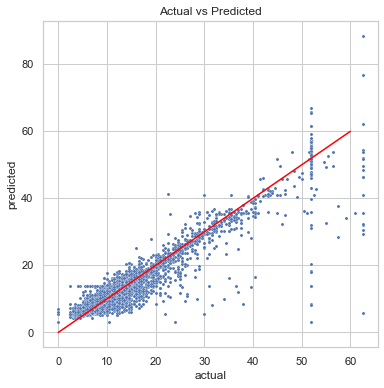

In [121]:
figure,ax=plt.subplots(figsize=(6,6))
#sns.set(style='Whitegrid')
sns.scatterplot(x=results['actual'],y=results['predicted'],data=results,alpha=1,s=10,ax=ax)
plt.plot([0,60],[0,60],c='red')
plt.title('Actual vs Predicted')
plt.show()

Visualize the distribution of the residuals using a histogram

In [122]:
y_pred.ravel()

array([12.45923399, 16.43143674,  6.8417248 , ...,  7.09020327,
        6.81295476, 10.24977511])

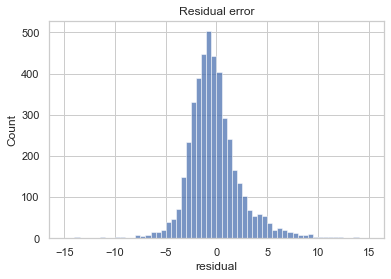

In [123]:
sns.histplot(x=results['residual'],bins=np.arange(-15,15.5,0.5))
plt.title('Residual error')
plt.show()

In [124]:
results['residual'].mean()

-0.01469850494903893

The distribution of the residuals is approximately normal and has a mean of -0.0146. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

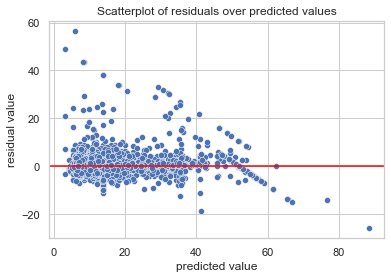

In [125]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()


# Predict on full dataset

In [141]:
X_scaled = scaler.transform(X)
y_preds_full = model.predict(X_scaled)

In [148]:
final_predict=df[['RatecodeID']].copy()
final_predict['y_preds_full']=y_preds_full
final_predict.loc[final_predict['RatecodeID']==2,'y_preds_full']=52
final_predict[final_predict['RatecodeID']==2].head(5)


,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


In [151]:
final_predict= final_predict['y_preds_full']
final_predict

0        16.458583
1        16.172864
2         6.918968
3        18.707855
4        15.701751
           ...    
22694     7.660932
22695    52.000000
22696     6.246806
22697    11.691672
22698     8.718277
Name: y_preds_full, Length: 22699, dtype: float64

In [154]:
nyc_preds_means = df2[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_predict

nyc_preds_means.head()


,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.458583
1,24.470370,3.108889,16.172864
2,7.250000,0.881429,6.918968
3,30.250000,3.700000,18.707855
4,14.616667,4.435000,15.701751


# conclusion for regression model

Model Performance: The model works really well on both the data it was trained on and new data it hasn't seen before. This suggests that the model isn't biased and it's not just memorizing the training data (which is called overfitting). Surprisingly, the model even did slightly better on the new data than on the data it was trained on.

R2 Score: The R2 score for the test data is 0.868. This means that about 86.8% of the differences in the fare prices can be explained by the model. So, the model is pretty good at predicting how much a taxi fare will cost.


MAE tells us the average difference between predicted and actual taxi fares. It shows accuracy without treating larger errors as proportionally worse.











Task-You are a data professional in a data consulting firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

The purpose of this model is to find ways to generate more revenue for taxi cab drivers.

The goal of this model is to predict whether or not a customer is a generous tipper.


# Build a machine learning model


Ideally, we'd have behavioral history for each customer, so we could know how much they tipped on previous taxi rides. We'd also want times, dates, and locations of both pickups and dropoffs, estimated fares, and payment method.

The target variable would be a binary variable (1 or 0) that indicates whether or not the customer is expected to tip ≥ 20%

In [157]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [158]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

In [165]:
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [162]:
nyc_preds_means

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.458583
1,24.470370,3.108889,16.172864
2,7.250000,0.881429,6.918968
3,30.250000,3.700000,18.707855
4,14.616667,4.435000,15.701751
...,...,...,...
22694,8.594643,1.098214,7.660932
22695,59.560417,18.757500,52.000000
22696,6.609091,0.684242,6.246806
22697,16.650000,2.077500,11.691672


In [168]:
# Merge datasets
df0=df.merge(nyc_preds_means,left_index=True,right_index=True)
df0


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.458583
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.172864
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,6.918968
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.707855
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.00,0.3,17.80,14.616667,4.435000,15.701751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,...,4.0,1.0,0.5,0.00,0.00,0.3,5.80,8.594643,1.098214,7.660932
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,...,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.560417,18.757500,52.000000
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,...,4.5,0.0,0.5,0.00,0.00,0.3,5.30,6.609091,0.684242,6.246806
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,...,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.650000,2.077500,11.691672
